#**목표 : 주택 가격 예측하기 & 주택 가격 분류하기**

* 하나의 데이터 셋을 활용하여 머신러닝의 주요 모델인 회귀모델 과 분류모델을 모두 사용하고자 한다.
* 머신러닝의 방법론들과 전체적인 데이터 분석 프로세즈에 대해 경험해보고자 한다.

#**1. 데이터 업로드하기**

In [1]:
# mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/열정페이 봉사/housingdata.csv")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,NaN,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,0
522,NaN,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,0
523,NaN,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,0
524,NaN,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,0


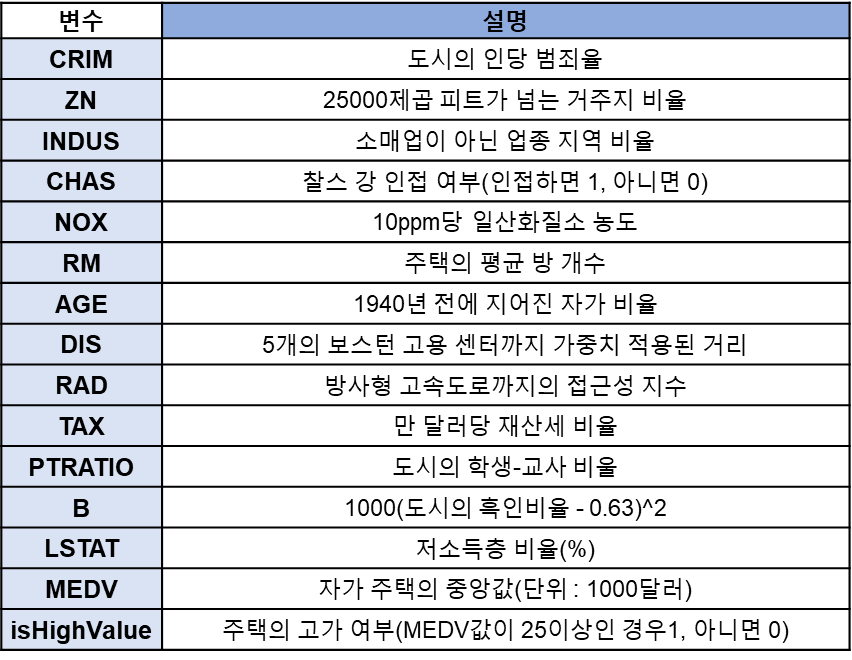

데이터 컬럼은 총 15개로 이루어져 있다

*  **종속변수, 독립변수 ?** : 종속변수 = Y / 독립변수 = X를 의미함. 오늘 우리가 사용할 머신러닝 방법론은 우리가 흔히 수학문제를 풀때 접한 방정식처럼 ***X들을 통해 Y를 구하는것과 같은 원리이다.***
*   **MEDV** : 자가 주택 가격의 중앙값을 의미 & 우리가 관심있는 ***회귀모델 을 위한 종속변수***
*   **isHighValue** : 임의로 만든 파생변수( MEDV값이 25이상인 경우 1, 아니면 0 ) & 우리가 관심있는 ***분류모델을 위한 종속변수***






##★질문1: 왜 다른 종속변수를 이용할까? 어차피 "주택의 가격"을 예측하고 분류하는게 목적인데 종속변수를 MEDV로 통일해도 되는거 아닌가?

* **회귀 모델링**: 연속형 결과 변수를 예측하는 데 사용 예) 주택 가격 예측이나 판매량 예측과 같이 ***연속적인 값을 예측하는 문제***
* **분류 모델링**: 이산형 결과 변수를 예측하는 데 사용 즉 클래스 레이블을 예측하는 문제에 적합함 예) 이메일 스팸 분류나 질병 유무 판단과 같이 ***카테고리 형태의 결과를 예측하는 문제***

#**2. 데이터 전처리**

##**▶ 2-1) 데이터 확인**

데이터 세트를 불러온 후 데이터에 대한 기본정보를 확인하는 과정은 꼭 필요함!

In [3]:
print(data.shape)

(526, 15)


* 526개의 행, 15개의 열이라는 뜻

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           526 non-null    float64
 2   INDUS        526 non-null    float64
 3   CHAS         526 non-null    int64  
 4   NOX          526 non-null    float64
 5   RM           526 non-null    float64
 6   AGE          526 non-null    float64
 7   DIS          526 non-null    float64
 8   RAD          526 non-null    int64  
 9   TAX          526 non-null    float64
 10  PTRATIO      526 non-null    float64
 11  B            526 non-null    float64
 12  LSTAT        526 non-null    float64
 13  MEDV         526 non-null    float64
 14  isHighValue  526 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 61.8 KB
None


*   info 함수를 사용하여 컬럼별 데이터 타입과 결측치의 존재 여부 확인
*   **Non-Null Count** : 각 컬럼별 null이 아닌 행 수를 의미
* CRIM의 Non-Null Count : 506개

    ▶ 전체 데이터 행 수가 526개이므로 20개의 결측치가 있는 것으로 확인
* **Dtype** : 각 컬럼별 데이터 타입을 의미





In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue
count,506.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,3.613524,10.931559,11.306616,0.066540,0.555954,6.271076,68.816540,3.742880,9.416350,410.547529,18.513308,357.888099,12.721578,22.374525,0.250951
std,8.601545,22.977112,6.934739,0.249461,0.113854,0.698140,27.868375,2.083661,8.653743,169.180818,2.147684,89.829808,7.101213,9.104400,0.433973
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.453000,5.879250,45.625000,2.101425,4.000000,279.000000,17.400000,376.057500,7.150000,16.850000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.183500,77.500000,3.095750,5.000000,334.500000,19.100000,391.955000,11.490000,21.100000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.613500,93.900000,5.112625,24.000000,666.000000,20.200000,396.397500,17.057500,24.950000,0.750000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


* **describe()** : 각 분포가 치우쳐져 있는지 값 범위는 어디에 걸쳐저 있는지, 편차가 큰지 작은지 등의 확인 가능
* **ZN**의 중앙갑이 0이고 **CHAS**의 변수의 3분위수가 0인것이 특징

##**▶ 2-2) 결측지 처리**


In [6]:
data.isnull().sum()

CRIM           20
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
MEDV            0
isHighValue     0
dtype: int64



*   결측치가 존재할 경우 : 행 제거 or 다른 값으로 대체




**(1) 결측지를 중앙값으로 대체**

In [7]:
data1 = data.copy()

med_val = data["CRIM"].median()
data1["CRIM"] = data1["CRIM"].fillna(med_val)

data1.isnull().sum()

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
MEDV           0
isHighValue    0
dtype: int64

**(2) 결측지 제거**

In [8]:
data = data.dropna()
data.isnull().sum()

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
MEDV           0
isHighValue    0
dtype: int64

##**▶ 2-3) 이상치 처리**

이상치를 처리하는 방법 : 일반적으로 IQR값을 이용해서 확인!


*   **IQR 이란 ?** : Q3(제3사분위) - Q1(제1사분위)
*   Q1-1.5*IQR 보다 작거나 Q1+1.5*IQR 보다 크면 이상치로 판단



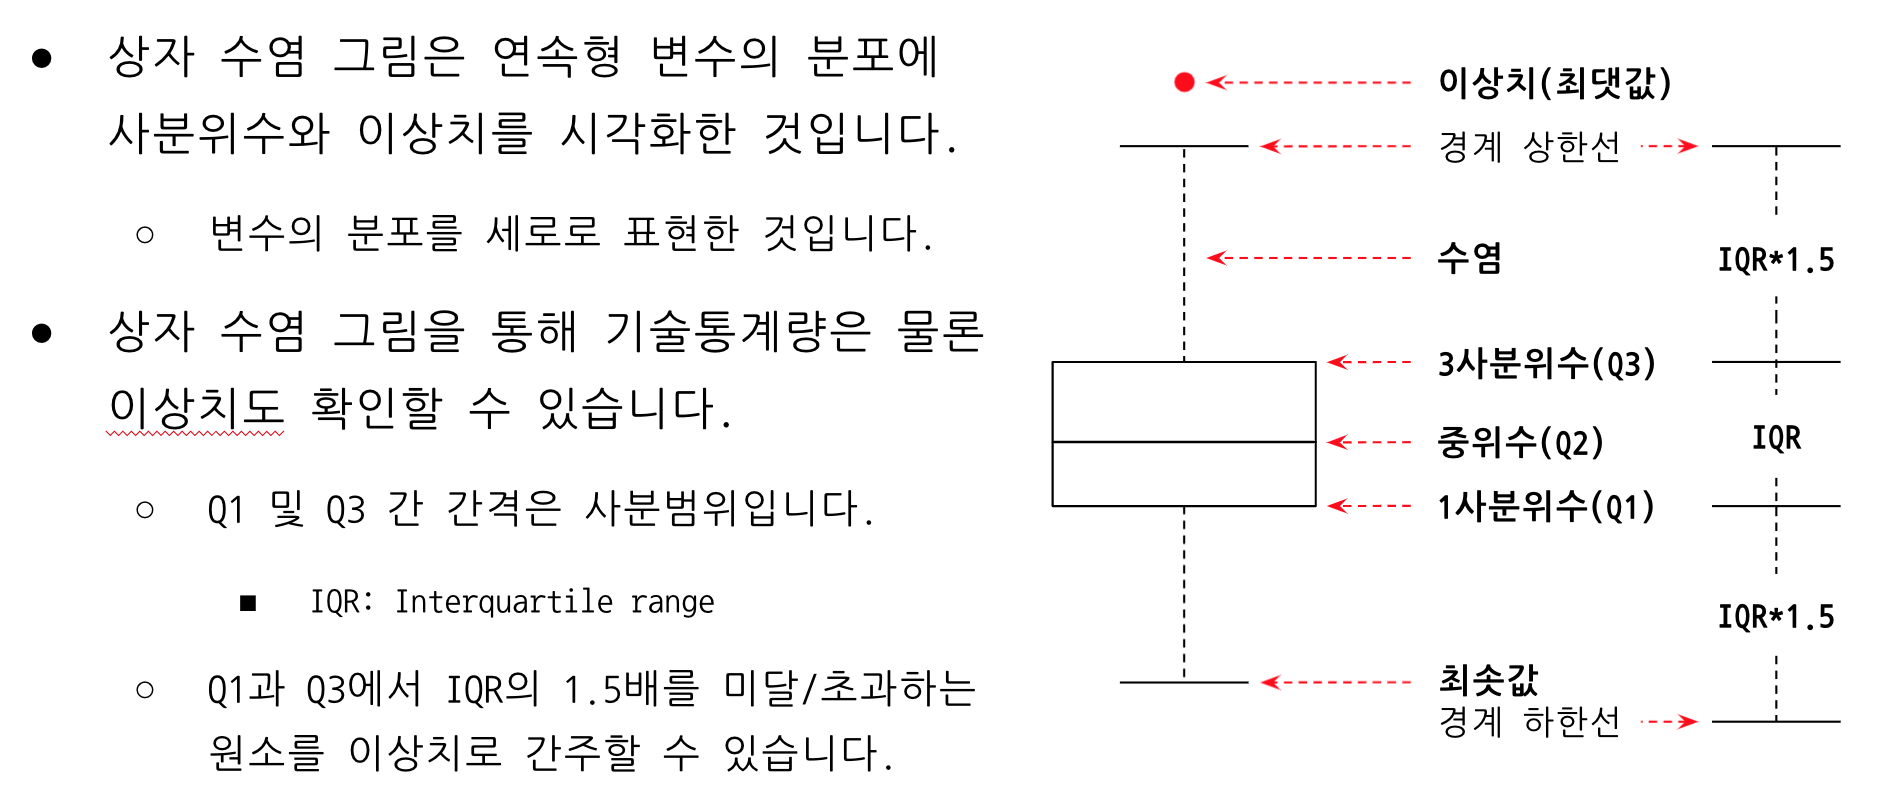

**(1) boxplot 그래프를 통해 간단하게 확인해보기**

<Axes: >

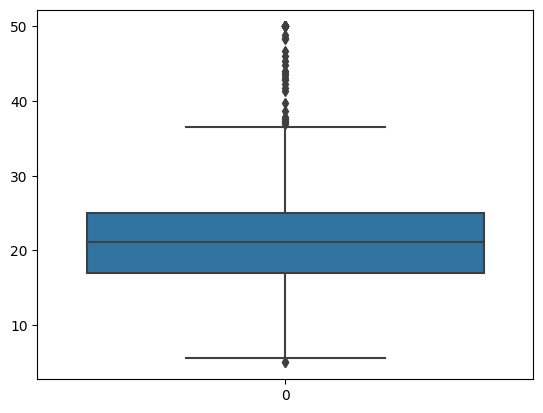

In [9]:
import seaborn as sns

sns.boxplot(data["MEDV"])



*   예시로 종속변수인 **MEDV**를 **boxplot**으로 그려보기
* 상자 수염 그림은 연속형 변수의 분포에 사분위수와 이상치를 시각화한
*   위 그림을 그렸을때 일반적으로 20부근에 값이 분포, 이상치 존재



**(2) IQR값 이상치 함수화를 통해 전체 컬럼의 아싱치 비율을 확인해보기**

In [10]:
#나중에 설명할때 보여줄 코드

def get_outlier_prop(x):
  Q1, Q3 = x.quantile([0.25, 0.75])
  IQR = Q3 - Q1
  upper_bound = Q3 + 1.5*IQR
  lower_bound = Q3 - 1.5*IQR
  outliers = x[(x>upper_bound)|(x<lower_bound)]

  return str(round(100*len(outliers)/len(x), 1)) + '%'

print(data.apply(get_outlier_prop))


CRIM           13.0%
ZN             13.4%
INDUS           0.0%
CHAS            6.9%
NOX             0.0%
RM             12.6%
AGE             6.9%
DIS             1.0%
RAD             0.0%
TAX             0.0%
PTRATIO        15.8%
B              20.4%
LSTAT           1.8%
MEDV           18.0%
isHighValue     0.0%
dtype: object


## ★질문2 : 그렇다면 이상치로 판단되는 관측치는 무조거 제거해야 할까?

답 : X



1.   이상치를 모두 제거할 경우 전체 데이터 행 수가 너무 많이 줄어들 우려가 있음( 이상치 제거의 목적은 분석 모형의 성능을 향상시키기 위함이므로 데이터 수를 줄이지 않는 선에서 처리가 이루어져야 함 )
2.   통계적으로 이상치일지라도 의미상 이상치가 아닐 수도 있다.
      * CHAS 변수 : 이상치가 있는 것으로 나왔지만 0,1로만 구성되어 있는 더미변수이기 때문에 실제 X
      * MEDV 변수 : 일반적으로 주택 가격의 편차가 심하기 때문에 고가의 주택이 위치해 있는 지역에 대한 학습을 못하는 결과를 불러올 수 있음



##**▶ 2-4) 변수변환**

언제할까?
* 변수의 분포가 한쪽으로 크게 치우쳐 있어 정규분포를 따른다고 보기 힘든 경우 수행하기
* 각 변수별로 데이터의 범위 및 단위가 다를 경우 수행하기

<ipython-input-12-03f252105a2f>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols[idx]], ax = axs[_row][_col])
<ipython-input-12-03f252105a2f>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols[idx]], ax = axs[_row][_col])
<ipython-input-12-03f252105a2f>:10: UserWarning: 

`di

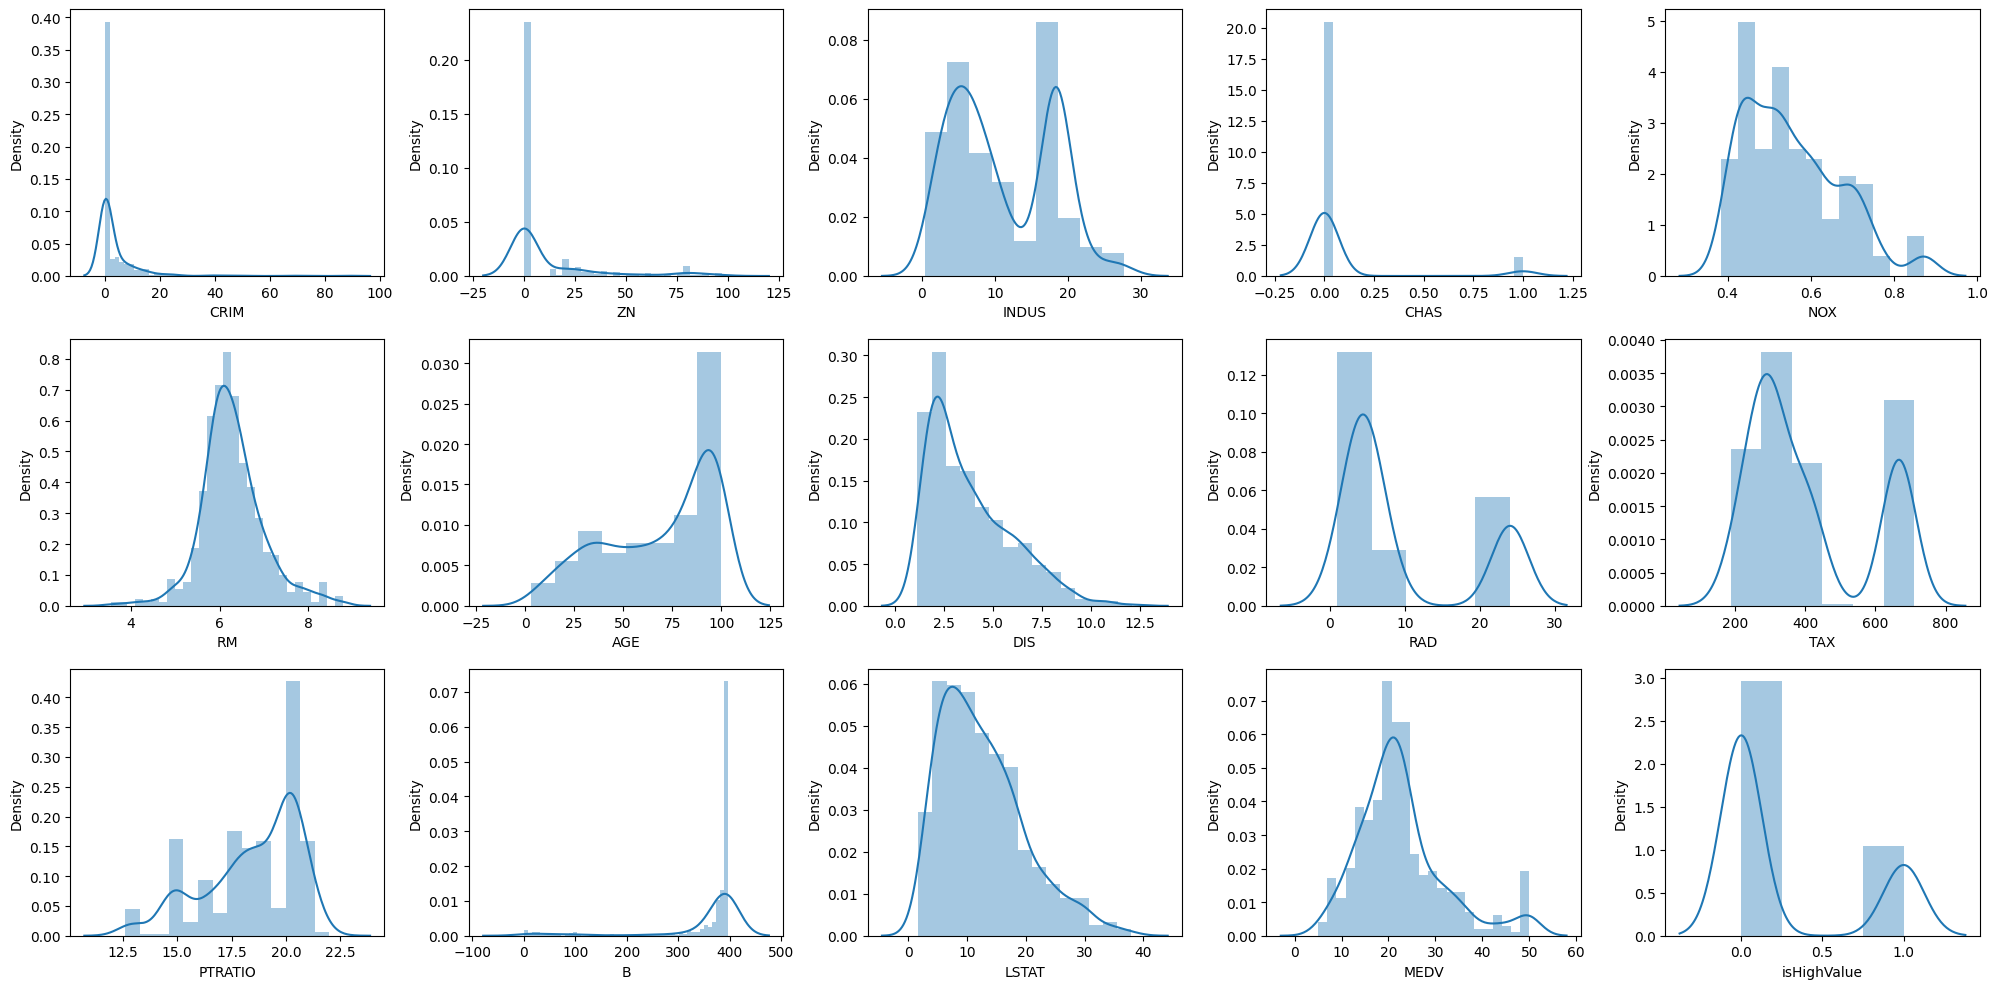

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = data.columns
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20,10)) #행이 3개이고 열이 5개인 형태로 그래프 그리기
idx = 0
for _row in range(3) :
  for _col in range(5):
    if idx < len(cols):
      sns.distplot(data[cols[idx]], ax = axs[_row][_col])
      idx+=1

plt.tight_layout()

* 분포확인시 CRIM, ZN, B변수가 한쪽으로 크게 치우쳐저 있음
* skew함수를 통해 왜도값을 구해보기( 일반적으로 왜도의 절댓값이 3 이상이면 크게 치우쳐저 있다고 해석 가능)

In [13]:
data.apply(lambda x: x.skew(), axis =0)

CRIM           5.223149
ZN             2.225666
INDUS          0.295022
CHAS           3.405904
NOX            0.729308
RM             0.403612
AGE           -0.598963
DIS            1.011781
RAD            1.004815
TAX            0.669956
PTRATIO       -0.802325
B             -2.890374
LSTAT          0.906460
MEDV           1.108098
isHighValue    1.092403
dtype: float64

##★질문3: 이렇게 왜도가 높게 나온 변수 분포의 치우침을 완화하기 위해서는 어떤 처리를 할 수 있을까?

답 : 로그를 씌워준다

In [14]:
import numpy as np

data["CRIM"] = np.log1p(data["CRIM"])
print(data["CRIM"].skew())

1.2692005882725572


<ipython-input-14-be1f8a93e25f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CRIM"] = np.log1p(data["CRIM"])


로그 변환 후에 왜도 값이 1.27로 분포의 치우침이 해소됨

#**3. 회귀모델링**

##**3-1) 데이터 탐색**


**(1) 데이터 생성**

In [33]:
df_r = data.drop(["isHighValue"], axis = 1)



* 앞서 말한 것처럼 회귀모델에서는 종속변수로 MEDV변수 사용
* 즉 분류 모델의 종속 변수로 사용할 isHighValue는 제외해주기

**(2) 상관관계 확인**

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.353522  0.660283 -0.016398  0.707587 -0.288784  0.559591   
ZN      -0.353522  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.660283 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.016398 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.707587 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.288784  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.559591 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.586366  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.904753 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.860381 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.390052 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.508852  0.175520 

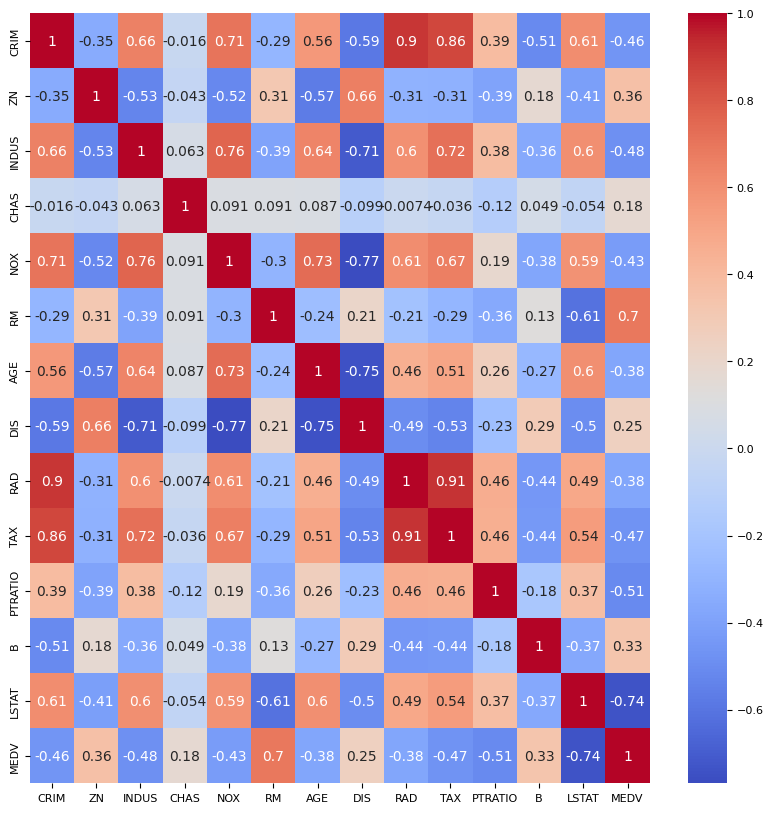

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# 피쳐들의 상관 행렬 계산
corr = df_r.corr()
print(corr)

# heatmap 함수를 사용하여 시각화
plt.figure(figsize=(10, 10))
plt.rc('xtick', labelsize=8)  # x축 눈금 폰트 크기
plt.rc('ytick', labelsize=8)  # y축 눈금 폰트 크기
sns.heatmap(corr, annot=True, cmap='coolwarm')  # annot_kws를 사용하여 annot의 폰트 크기 조정
plt.show()

* 변수들간의 상관관계를 살펴보니 RAD, TAX, CRIM 사이의 강한 상관관계 존재
* 독립변수들간의 강한 상관관계가 존재할 결우 "다중공선성"을 갖는다고 말하며 모델 성능에 안좋은 영향을 줄 수 있음
* 해당 경우 변수제거나 주성분분석, 변수결합 등으로 해결가능

##**3-2) 분석 모형 구축**

**(1) 데이터 분할**



In [35]:
from sklearn.model_selection import train_test_split
X_cols = ["LSTAT", "PTRATIO", "TAX","AGE","NOX","INDUS","CRIM"]

X = df_r[X_cols].values
y = df_r["MEDV"].values

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.3, random_state=123)



*   모델 구축 전 데이터를 학습데이터와 검증 데이터로 나누기( 7:3비율)
*   독립변수 전체를 사용하지 않고 종속변수와 상관관계가 높게 나온 일부 변수만 사용
*   sklearn 패키지의 train_test_split 함수 이용



##★질문4: 왜 데이터를 학습데이터와 검증 데이터로 굳이 나눌까?

답 : 모델이 실제 상황에서 잘 작동하고 어떤 모델을 선택해야 하는지 판단하기위해.

학습 데이터로 모델을 학습시킨 후, 검증 데이터로 모델의 성능을 평가하함으로써 모델이 새로운 데이터에서 얼마나 잘 작동하는지 알 수 있게함. 학습 데이터만 사용하면 모델이 학습 데이터에만 맞춰져서 실제 상황에서 성능이 떨어질 수 있음

**(2) 데이터 스케일링**

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)

* MinMaxScaler()는 데이터를 최소값과 최대값을 기준으로 정규화하는 데 사용되는 데이터 변환 기법 → 데이터의 범위를 0과 1 사이로 조정할 수 있음

* 모든 특성이 동일한 범위에 위치하게 되므로, 특성 간 스케일 차이를 줄이고 비교 가능한 형태로 만들줌

**(3) 모델구축**

* 회귀모델링을 위한 방법론들 중 ***선형회귀, SVM, 랜덤포레스트*** 사용( default 설정 그대로)
* 실무에서는 각 모델별 하이퍼 파라미터 튜닝을 통해 성능을 올리는 작업을 하게 됨
  * **하이퍼파라미터:** 모델의 학습 과정을 제어하고 조절하는 매개변수로, 사용자가 직접 설정해야 하는 값(예:학습률, 배치 크기, 에포크 수, 트리의 최대 깊이 등)

##★질문5: 지도 학습만 있을까?

답 : No

입력 데이터의 구조, 패턴, 군집 등을 탐색하거나 알고리즘에 의한 데이터 변환을 통해 데이터의 숨겨진 구조를 발견할때 비지도 학습 이용함.

예:) 군집화(Clustering), 차원 축소(Dimensionality Reduction), 이상 탐지

**● 선형회귀**

In [37]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train_r_scaled, y_train_r)

LinearRegression()

* 선형 회귀는 종속 변수와 한 개 이상의 독립 변수 간의 관계를 모델링하는 데 사용되는 ***지도 학습 알고리즘***
* 지도 학습: 입력 데이터인 x와 해당 데이터에 대한 정답인 y(레이블 또는 타겟 변수) 사이의 관계를 학습하여 새로운 입력 데이터 x에 대한 예측 값을 도출

**● SVM**

In [38]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(X_train_r_scaled, y_train_r)

SVR()

* SVM은 데이터를 선형 또는 비선형으로 분류하는 데 사용되는 지도 학습 알고리즘으로 회귀모델링과 분류모델링에서 모두 사용

**● 랜덤포레스트**

In [39]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor(random_state=123)
model_rfr.fit(X_train_r_scaled, y_train_r)

RandomForestRegressor(random_state=123)



*   랜덤 포레스트는 여러개의 "Decision Tree"라는 모델이 예측한 결과를 결합하여 최종 예측을 수행하는 지도 학습 알고리즘



##**3-3) 분석 모형 평가**

* 데이터를 분할하여 만들었던 테스트 데이터로 회귀 모델을 평가하기
* predict함수를 이용해서 테스트 데이터로 예측값 구하기

In [42]:
y_pred_lr = model_lr.predict(X_test_r_scaled)
y_pred_svr = model_svr.predict(X_test_r_scaled)
y_pred_rfr = model_rfr.predict(X_test_r_scaled)


* 회귀모델의 평가지표들 중 MSE(평균 제곱 오차(Mean Squared Error)를 사용
* 예측값과 실제값 사이의 오차를 통해 성능을 평가하는것이기 때문에 MSE 값이 낮을 수록 성능 우수

In [43]:
from sklearn.metrics import mean_squared_error
print('-'*30)
print("선형 회귀 결과")
print("MSE: %.3f"%mean_squared_error(y_test_r, y_pred_lr))
print('-'*30)
print("SVM 결과")
print("MSE: %.3f"%mean_squared_error(y_test_r, y_pred_svr))
print('-'*30)
print("랜덤포레스트 결과")
print("MSE: %.3f"%mean_squared_error(y_test_r, y_pred_rfr))

------------------------------
선형 회귀 결과
MSE: 34.861
------------------------------
SVM 결과
MSE: 36.890
------------------------------
랜덤포레스트 결과
MSE: 17.955


**성능 : 랜덤포레스트 > SVM > 선형회귀 순으로 나타남**

#**4. 분류모델링**

##**4-1) 데이터 탐색**

**(1) 데이터 생성**

In [46]:
df_c = data.drop(["MEDV"], axis = 1)

* 앞서 말한 것처럼 분류모델에서는 종속변수로 isHighValue 사용
* 즉 회귀 모델의 종속 변수로 사용했던 MEDV 변수는 제외해주기

**(2) boxplot 그래프를 통해 종속변수와 독립변수 간의 관계 확인해보기**


<Axes: xlabel='isHighValue', ylabel='LSTAT'>

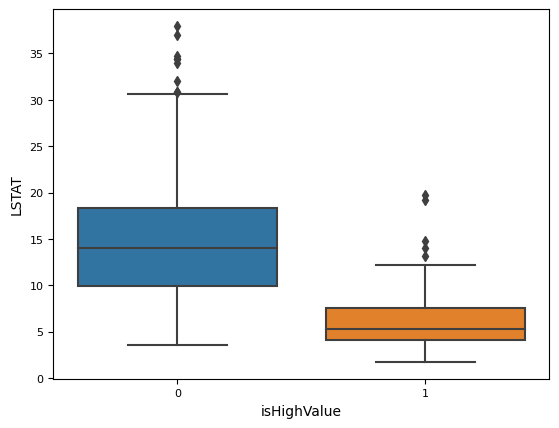

In [47]:
import seaborn as sns

sns.boxplot(x='isHighValue', y='LSTAT', data = df_c)




* isHighValue 값이 0인지 1인지에 따라 LSTAT 변수의 값 분포가 크게 차이남을 알 수 있음

##**4-2) 분석 모형 구축**

회귀 모델링과 전체적인 틀은 같고 종속변수를 지정하는 부분만 차이가 존재한다.

**(1) 데이터 분할**

In [49]:
from sklearn.model_selection import train_test_split
X_cols = ["LSTAT", "PTRATIO", "TAX","AGE","NOX","INDUS","CRIM"]

X = df_c[X_cols].values
y = df_c["isHighValue"].values

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.3, random_state=123)

**(2) 데이터 스케일링**

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

**(3) 모델구축**

● 로지스틱 회귀

In [62]:
from sklearn.linear_model import LogisticRegression
model_lo = LogisticRegression()
model_lo.fit(X_train_c_scaled, y_train_c)

LogisticRegression()

* 로지스틱 "회귀" 라는 이름때문에 회귀 모델링과 헷갈릴 수 있지만 분류 모델임
* 입력 변수(x)와 이진 분류(0 또는 1)의 관계를 모델링하여 새로운 입력 데이터가 어느 클래스에 속하는지 예측하는 지도 학습 알고리즘임

● SVM

In [67]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train_c_scaled, y_train_c)

SVC()

● 랜덤포레스트

In [68]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(random_state=123)
model_rfc.fit(X_train_c_scaled, y_train_c)

RandomForestClassifier(random_state=123)

##**4-3) 분석 모형 평가**


* predict 함수: 예측값을 구하게 함. 예측 값이 0.5 이상이면 1, 아니면 0값을 결과로 얻을 수 있음


In [69]:
y_pred_lo = model_lo.predict(X_test_c_scaled)
y_pred_svc = model_svc.predict(X_test_c_scaled)
y_pred_rfc = model_rfc.predict(X_test_c_scaled)

* 분류모델의 성능을 측정하는 지표로는 accuracy, precision, recall등이 존재함
* sklearn 패키지의 classification_report 함수를 사용하면 평가 지표를 한번에 다 구할 수 있음

In [70]:
from sklearn.metrics import classification_report
print('-'*60)
print("로지스틱 회귀 결과")
print(classification_report(y_test_c, y_pred_lo, labels = [0,1]))
print('-'*60)
print("SVM 결과")
print(classification_report(y_test_c, y_pred_svc, labels = [0,1]))
print('-'*60)
print("랜덤포레스트 결과")
print(classification_report(y_test_c, y_pred_rfc, labels = [0,1]))

------------------------------------------------------------
로지스틱 회귀 결과
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       115
           1       0.89      0.65      0.75        37

    accuracy                           0.89       152
   macro avg       0.89      0.81      0.84       152
weighted avg       0.89      0.89      0.89       152

------------------------------------------------------------
SVM 결과
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       115
           1       0.84      0.73      0.78        37

    accuracy                           0.90       152
   macro avg       0.88      0.84      0.86       152
weighted avg       0.90      0.90      0.90       152

------------------------------------------------------------
랜덤포레스트 결과
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       115
           1       0.86   

* **F1 score:** 모델의 정밀도(Precision)와 재현율(Recall)을 조합으로 제일 보편적인 성능지표
  * 정밀도: 모델이 True로 예측한 샘플 중 실제로 True인 샘플의 비율
  * 재현율: 실제 True인 샘플 중 모델이 True로 예측한 샘플의 비율

* Macro F1 score: 클래스별 F1 스코어의 평균값을 계산한 것으로, 모든 클래스에 동일한 가중치를 부여

* Weighted F1 score: 각 클래스의 샘플 수에 따라 가중치를 부여한것으로 각 클래스의 샘플 수에 따른 중요도를 성능에 반영하고자 할 때 유용

**랜덤포레스트가 제일 성능이 높은 모델로 나타남**

#**총정리**

* 데이터 전처리(확인, 결측치 및 이상치 처리, 변수변환) 부터  모델링(탐색, 분석모형 구축, 분석모형 평가) 까지 전체적인 데이터 분석 프로세스에 대해 익힘

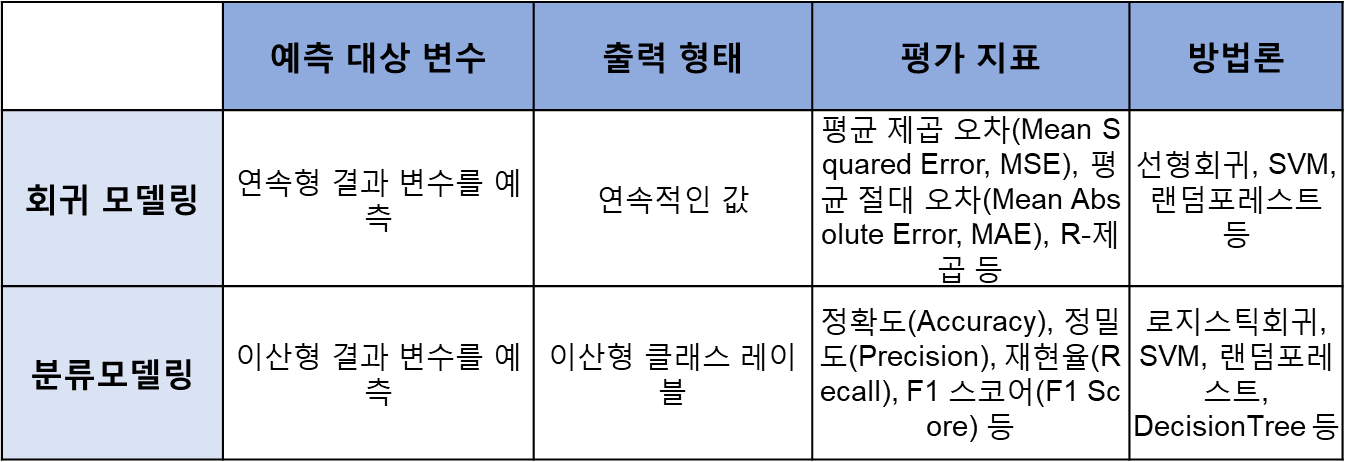